In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,Normalizer,LabelEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import dask.dataframe as dd
import PIL

In [ ]:
#Shuffling the dataset
filename = './Ninapro_DB1.csv'
df = pd.read_csv(filename)
df = df.sample(frac=1,random_state=42)
df.to_csv('./shuffled_data.csv')

In [6]:
# Emg (10 columns): sEMG signal. Columns 1-8 are the electrodes equally spaced around the forearm at the height of the radio humeral joint. Columns 9 and 10 contain signals from the main activity spot of the muscles flexor and extensor digitorum superficialis.
# Glove (22 columns): uncalibrated signal from the 22 sensors of the cyberglove.
# The cyberglove signal corresponds to raw data from the cyberglove sensors, which are expected to be proportional to the angles at the joints.

In [2]:
#Loading the dataset in chunks
chunksize = 10 ** 6
filename = './Ninapro_DB1.csv'
chunks = []
with pd.read_csv(filename, chunksize=chunksize) as reader:

   for chunk in reader:
    chunks.append(chunk)

df = pd.concat(chunks)
# df = pd.read_csv(filename,nrows=400000)

<Axes: xlabel='exercise'>

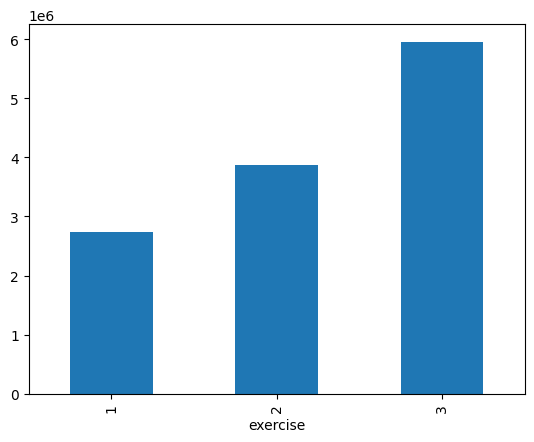

In [3]:
df['exercise'].value_counts().sort_index().plot.bar()


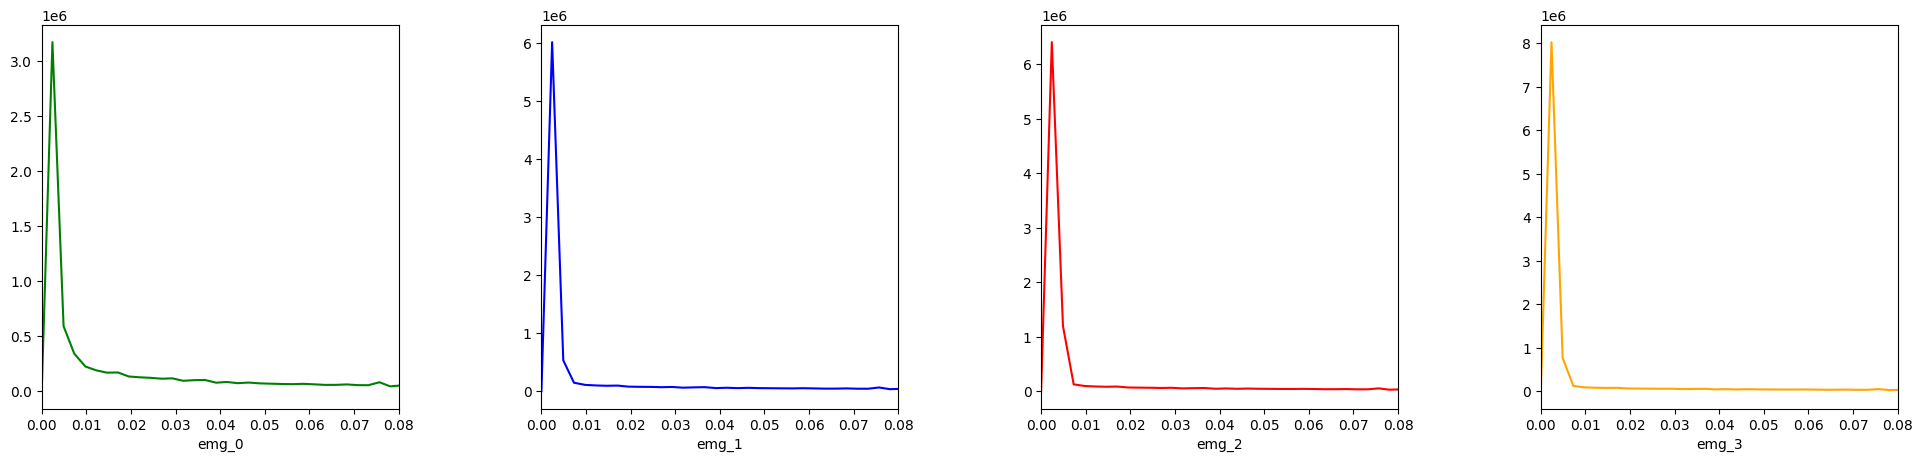

In [4]:
#Plot emg_0
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=3.0, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.subplot(1,4,1).set_xlim(0,0.080)
df['emg_0'].value_counts().sort_index().plot.line(color='green')
plt.subplot(1,4,2).set_xlim(0,0.080)
df['emg_1'].value_counts().sort_index().plot.line(color='blue')
plt.subplot(1,4,3).set_xlim(0,0.080)
df['emg_2'].value_counts().sort_index().plot.line(color='red')
plt.subplot(1,4,4).set_xlim(0,0.080)
df['emg_3'].value_counts().sort_index().plot.line(color='orange')
plt.show()


In [5]:
#Scatter Plot
df.plot.scatter(y='exercise', x='glove_18')

MemoryError: Unable to allocate 2.99 GiB for an array with shape (32, 12553611) and data type float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12553611 entries, 0 to 12553610
Data columns (total 39 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   emg_0         float64
 2   emg_1         float64
 3   emg_2         float64
 4   emg_3         float64
 5   emg_4         float64
 6   emg_5         float64
 7   emg_6         float64
 8   emg_7         float64
 9   emg_8         float64
 10  emg_9         float64
 11  glove_0       float64
 12  glove_1       float64
 13  glove_2       float64
 14  glove_3       float64
 15  glove_4       float64
 16  glove_5       float64
 17  glove_6       float64
 18  glove_7       float64
 19  glove_8       float64
 20  glove_9       float64
 21  glove_10      float64
 22  glove_11      float64
 23  glove_12      float64
 24  glove_13      float64
 25  glove_14      float64
 26  glove_15      float64
 27  glove_16      float64
 28  glove_17      float64
 29  glove_18      float64
 30  glove_19      fl

In [7]:
print(f'shape of given data is :- {df.shape}')
#1-7 sEMG signals for each subject 
#8-30 22 glove elctrodes stimulus generated using the glove
#unnamed - 0
#1 stimulus, 1 restimulus, 1 subject , 1 rerepetition, 1 exericise,1 repetition

shape of given data is :- (12553611, 39)


In [8]:
print('values are :- {}'.format(df['exercise'].value_counts()))

values are :- exercise
3    5953650
2    3868568
1    2731393
Name: count, dtype: int64


In [9]:
df.tail(5)

,Unnamed: 0,emg_0,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,...,glove_18,glove_19,glove_20,glove_21,exercise,stimulus,restimulus,repetition,rerepetition,subject
12553606,217538,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0854,0.1489,0.0024,...,136.0,165.545149,152.0,113.000000,3,0,0,0,0,9
12553607,217539,0.0024,0.0024,0.0024,0.0024,0.0024,0.0464,0.0757,0.1270,0.0024,...,136.0,165.011701,152.0,113.000000,3,0,0,0,0,9
12553608,217540,0.0024,0.0024,0.0024,0.0024,0.0024,0.0537,0.0635,0.1123,0.0024,...,136.0,164.739192,152.0,113.260808,3,0,0,0,0,9
12553609,217541,0.0024,0.0024,0.0024,0.0024,0.0024,0.0586,0.0562,0.1050,0.0024,...,136.0,164.472536,152.0,113.527464,3,0,0,0,0,9
12553610,217542,0.0024,0.0024,0.0024,0.0024,0.0024,0.0635,0.0464,0.0928,0.0024,...,136.0,164.205829,152.0,113.794171,3,0,0,0,0,9


In [10]:
# signals from electrical sensors can sometimes have 60 Hz noise. This results from the fact that electricity of power outlets in the United States has a frequency of 60Hz. You can run a Fast Fourier Transform on the time series data to check if this type of noise is in your data. If it is, using a low-pass filter on your data should make it cleaner and improve the data quality
col = df.columns
col = np.array(col)
col
ax = df.cummax()
print(ax)

MemoryError: Unable to allocate 2.99 GiB for an array with shape (12553611, 32) and data type float64

In [11]:
#Dropping the corresponding index column
df = df.drop('Unnamed: 0',axis= 1)


In [12]:
df = df.drop('stimulus',axis=1)
df = df.drop('restimulus',axis=1)
df = df.drop('repetition',axis=1)
df = df.drop('rerepetition',axis=1)
df = df.drop('subject',axis=1)

In [13]:
df.columns

Index(['emg_0', 'emg_1', 'emg_2', 'emg_3', 'emg_4', 'emg_5', 'emg_6', 'emg_7',
       'emg_8', 'emg_9', 'glove_0', 'glove_1', 'glove_2', 'glove_3', 'glove_4',
       'glove_5', 'glove_6', 'glove_7', 'glove_8', 'glove_9', 'glove_10',
       'glove_11', 'glove_12', 'glove_13', 'glove_14', 'glove_15', 'glove_16',
       'glove_17', 'glove_18', 'glove_19', 'glove_20', 'glove_21', 'exercise'],
      dtype='object')

In [14]:
#Ranges for each column 
l = col.tolist()
l.pop(l.__len__()-1)
l.pop(l.__len__()-1)
l.pop(l.__len__()-1)
l.pop(l.__len__()-1)
l.pop(l.__len__()-1)
col = np.array(l)

In [12]:
print(df.max())
print(df.min())
print(df.median())
print(df.mean())

Dask Series Structure:
npartitions=1
emg_0      float64
glove_9        ...
dtype: float64
Dask Name: to_pyarrow_string, 10 graph layers
Dask Series Structure:
npartitions=1
emg_0      float64
glove_9        ...
dtype: float64
Dask Name: to_pyarrow_string, 10 graph layers


NotImplementedError: Dask doesn't implement an exact median in all cases as this is hard to do in parallel. See the `median_approximate` method instead, which uses an approximate algorithm.

In [15]:
X = df.loc[:,'emg_0':'glove_21']
Y = df['exercise']

In [16]:
X

,emg_0,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,...,glove_12,glove_13,glove_14,glove_15,glove_16,glove_17,glove_18,glove_19,glove_20,glove_21
0,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0146,0.0488,0.0024,0.0317,...,104.0,69.0,160.0,128.0,129.0,86.0,141.0,150.000000,147.0,113.000000
1,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0122,0.0439,0.0024,0.0317,...,104.0,69.0,160.0,128.0,129.0,86.0,141.0,150.000000,147.0,113.000000
2,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.0073,0.0366,0.0024,0.0293,...,104.0,69.0,160.0,128.0,129.0,86.0,141.0,150.000000,147.0,113.000000
3,0.0049,0.0024,0.0024,0.0024,0.0024,0.0073,0.0049,0.0317,0.0024,0.0269,...,104.0,69.0,160.0,128.0,129.0,86.0,141.0,150.000000,147.0,113.000000
4,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.0024,0.0220,...,104.0,69.0,160.0,128.0,129.0,86.0,141.0,150.000000,147.0,113.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12553606,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0854,0.1489,0.0024,0.0220,...,111.0,64.0,148.0,104.0,147.0,102.0,136.0,165.545149,152.0,113.000000
12553607,0.0024,0.0024,0.0024,0.0024,0.0024,0.0464,0.0757,0.1270,0.0024,0.0366,...,111.0,64.0,148.0,104.0,147.0,102.0,136.0,165.011701,152.0,113.000000
12553608,0.0024,0.0024,0.0024,0.0024,0.0024,0.0537,0.0635,0.1123,0.0024,0.0415,...,111.0,64.0,148.0,104.0,147.0,102.0,136.0,164.739192,152.0,113.260808
12553609,0.0024,0.0024,0.0024,0.0024,0.0024,0.0586,0.0562,0.1050,0.0024,0.0366,...,111.0,64.0,148.0,104.0,147.0,102.0,136.0,164.472536,152.0,113.527464


In [17]:
Y

0           1
1           1
2           1
3           1
4           1
           ..
12553606    3
12553607    3
12553608    3
12553609    3
12553610    3
Name: exercise, Length: 12553611, dtype: int64

In [18]:
labels = Y.unique()
labels

array([1, 2, 3], dtype=int64)

In [20]:
X = np.array(X)
Y = np.array(Y)
print('shape of X is {a} and that of Y is {b}'.format(a = X.shape,b = Y.shape))

MemoryError: Unable to allocate 2.99 GiB for an array with shape (12553611, 32) and data type float64

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,shuffle=True,test_size=0.20)

MemoryError: Unable to allocate 2.39 GiB for an array with shape (32, 10042888) and data type float64

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10042888, 32)
(2510723, 32)
(10042888,)
(2510723,)


In [21]:
X_train

array([[2.40000000e-03, 2.40000000e-03, 2.40000000e-03, ...,
        1.64000000e+02, 1.49000000e+02, 1.07000000e+02],
       [6.27400000e-01, 6.88500000e-01, 1.83100000e-01, ...,
        1.34775902e+02, 1.42000000e+02, 1.18000000e+02],
       [4.00400000e-01, 7.57000000e-02, 2.40000000e-03, ...,
        1.36283149e+02, 1.44000000e+02, 1.18000000e+02],
       ...,
       [4.90000000e-03, 2.40000000e-03, 2.40000000e-03, ...,
        9.70000000e+01, 1.47000000e+02, 1.16000000e+02],
       [1.05000000e-01, 2.20000000e-02, 7.57000000e-02, ...,
        1.78000000e+02, 1.42000000e+02, 1.17000000e+02],
       [1.05000000e-01, 2.40000000e-03, 2.40000000e-03, ...,
        1.62446806e+02, 1.41446806e+02, 1.18000000e+02]])

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [23]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,Y_train)
Y_preds = model.predict(X_test)

In [24]:
Y_preds

array([2, 3, 3, ..., 3, 3, 2], dtype=int64)

In [25]:
cm = confusion_matrix(y_true=Y_test,y_pred=Y_preds)
ac = accuracy_score(y_true=Y_test,y_pred=Y_preds)
print('The accuracy score is : {a}'.format(a = ac))

The accuracy score is : 0.9998219636335829


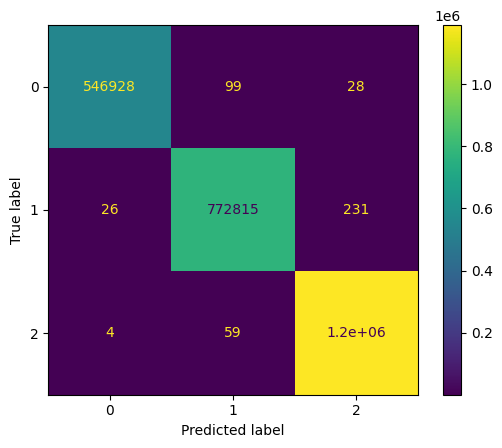

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [33]:
print('--------------------------------------------------------')
print('Classification report NinaPro data - Random Forest')
print(classification_report(Y_test, Y_preds))

--------------------------------------------------------
Classification report NinaPro data - Random Forest
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    547055
           2       1.00      1.00      1.00    773072
           3       1.00      1.00      1.00   1190596

    accuracy                           1.00   2510723
   macro avg       1.00      1.00      1.00   2510723
weighted avg       1.00      1.00      1.00   2510723



DESCISION TREE

In [27]:
x_dt = X
y_dt = Y

In [30]:
x_dt_train,x_dt_test,y_dt_train,y_dt_test = train_test_split(x_dt,y_dt,random_state=42,shuffle=True,test_size=0.20)

MemoryError: Unable to allocate 613. MiB for an array with shape (2510723, 32) and data type float64

In [35]:
print(x_dt_train.shape)
print(x_dt_test.shape)
print(y_dt_train.shape)
print(y_dt_test.shape)

(320000, 32)
(80000, 32)
(320000,)
(80000,)


In [28]:
sc = StandardScaler()
x_dt_train = sc.fit_transform(x_dt_train)
x_dt_test = sc.fit_transform(x_dt_test)

NameError: name 'x_dt_train' is not defined

In [40]:
dt_classifier = DecisionTreeClassifier(max_depth=3)
dt_classifier.fit(x_dt_train,y_dt_train)
y_dt_preds = dt_classifier.predict(x_dt_test)

In [42]:
cm = confusion_matrix(y_true=y_dt_test,y_pred=y_dt_preds)
ac = accuracy_score(y_true=y_dt_test,y_pred=y_dt_preds)
print('The accuracy score is : {a}'.format(a = ac))

The accuracy score is : 0.8248125


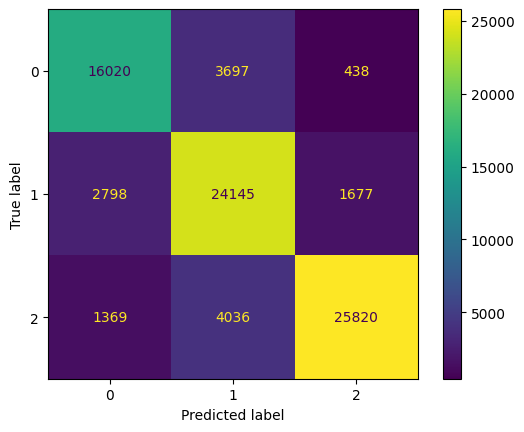

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

K-Nearest-Neighbors

In [44]:
x_knn = X
y_knn = Y

In [45]:
x_knn_train,x_knn_test,y_knn_train,y_knn_test = train_test_split(x_knn,y_knn,random_state=42,shuffle=True,test_size=0.20)

In [46]:
print(x_knn_train.shape)
print(x_knn_test.shape)
print(y_knn_train.shape)
print(y_knn_test.shape)

(320000, 32)
(80000, 32)
(320000,)
(80000,)


In [47]:
sc = StandardScaler()
x_knn_train = sc.fit_transform(x_knn_train)
x_knn_test = sc.fit_transform(x_knn_test)

In [56]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2,10,1)

In [57]:
n = 1
for neighbor in n_neighbors:
    #Varying the hyperparameter of n_neighbors to get appropriate value
    #i.e. to avoid underfitting and overfitting
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    #Fitting the new model
    knn.fit(x_knn_train,y_knn_train)
    #Getting the corresponding accuracy score for both train as well as test set
    train_score[neighbor] = knn.score(x_knn_train,y_knn_train)
    test_score[neighbor] = knn.score(x_knn_test,y_knn_test)
    #simple tracing of neighbours done till time t
    print(f'neighbour {n} done'.format(n = n))
    n+=1


neighbour 1 done
neighbour 2 done
neighbour 3 done
neighbour 4 done
neighbour 5 done
neighbour 6 done
neighbour 7 done
neighbour 8 done


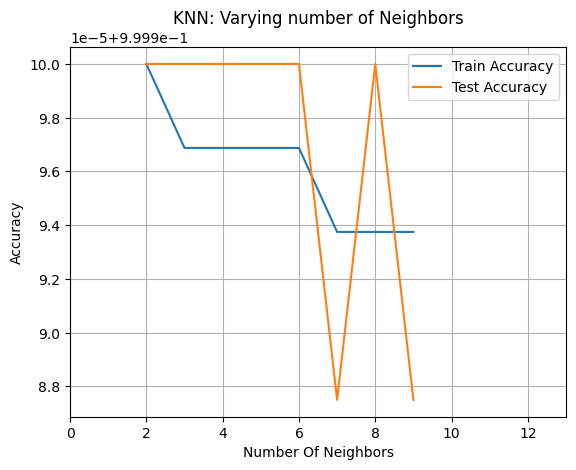

In [79]:
#Plotting the values of corresponding accuracy score acheived on diff.
#vals of n_neighbors
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 13)
plt.grid()
plt.show()

In [58]:
train_score

{2: 1.0,
 3: 0.999996875,
 4: 0.999996875,
 5: 0.999996875,
 6: 0.999996875,
 7: 0.99999375,
 8: 0.99999375,
 9: 0.99999375}

In [59]:
test_score

{2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 0.9999875, 8: 1.0, 9: 0.9999875}

In [90]:
grid_params = {
    'n_neighbors': [5,7,2,9,11],
    'weights':['uniform','distance'],
    'metric':['minkowski','euclidean','manhattan']
}

In [91]:
#Using the concept of Hyperparameter Cube for optimizing the hyperparameters 
#i have taken corresponding n_neighbors,weights,metric for measuring n space dist
gs = GridSearchCV(KNeighborsClassifier(),param_grid=grid_params,cv = 2,verbose=4)

In [92]:
g_res = gs.fit(x_knn_train,y_knn_train)hasfasfsafg

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[CV 1/2] END metric=minkowski, n_neighbors=5, weights=uniform;, score=1.000 total time=  17.7s
[CV 2/2] END metric=minkowski, n_neighbors=5, weights=uniform;, score=1.000 total time=  17.6s
[CV 1/2] END metric=minkowski, n_neighbors=5, weights=distance;, score=1.000 total time=  17.9s
[CV 2/2] END metric=minkowski, n_neighbors=5, weights=distance;, score=1.000 total time=  17.8s
[CV 1/2] END metric=minkowski, n_neighbors=7, weights=uniform;, score=1.000 total time=  17.6s
[CV 2/2] END metric=minkowski, n_neighbors=7, weights=uniform;, score=1.000 total time=  17.6s
[CV 1/2] END metric=minkowski, n_neighbors=7, weights=distance;, score=1.000 total time=  17.3s
[CV 2/2] END metric=minkowski, n_neighbors=7, weights=distance;, score=1.000 total time=  17.5s
[CV 1/2] END metric=minkowski, n_neighbors=2, weights=uniform;, score=1.000 total time=  17.4s
[CV 2/2] END metric=minkowski, n_neighbors=2, weights=uniform;, score=1.000 tota

In [63]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(x_knn_train,y_knn_train)
y_knn_preds = knn_classifier.predict(x_knn_test)

In [64]:
cm = confusion_matrix(y_true=y_knn_test,y_pred=y_knn_preds)
ac = accuracy_score(y_true=y_knn_test,y_pred=y_knn_preds)
print('The accuracy score is : {a}'.format(a = ac))

The accuracy score is : 1.0


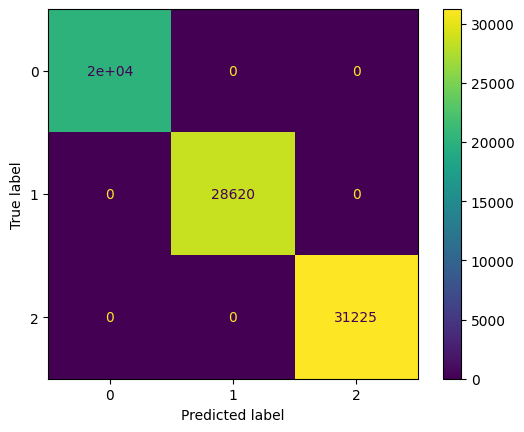

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()